In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

def load_df(filename):
    with open(f'/home/rth/Code/private/master-thesis/community-detection-benchmark/output/{filename}.json') as f:
        data = json.load(f)
    return data

def mk_df(data):
    return pd.DataFrame(data['result'])

def filter_bad_seeds(data):
    # filter out when at least on seed is equall 0 - means seeds count is broken...
    old_cnt = len(data['result'])
    
    
    new_result = [x for x in data['result'] if all(y != 0 for y in x['realSeedCommunitySizes'])]
    new_data = {**data, 'result': new_result }
    
    new_cnt = len(new_data['result'])
    print(f'removed rows: {old_cnt - new_cnt}/{old_cnt}')
    
    return new_data

def print_plots(df, data, param):
    for g in ['karate', 'dolphins', 'football', 'polbooks']:
        
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
        main_title = g.upper()
        fig.suptitle(main_title, fontsize=16)
        
        for i, alg in enumerate(['fastGreedy', 'louvain', 'edgeBetweenness']):
            baseline = next(x for x in data['baseline'] if x['graph'] == g and x['algorithm'] == alg)[param]
            
            curr = df[(df['graph'] == g) & (df['algorithm'] == alg+'Seed')]
            
            alg_title = alg[:1].upper() + alg[1:] + 'Seed'
            axes[0, i].set_title(f'{alg_title}\n(baseline: {baseline})')
            
            for (j, structure) in enumerate(['RANDOM', 'CONNECTED']):
                df_plot = curr[curr['seedStructureParam'] == structure].reset_index(drop=True)
                df_plot['index'] = df_plot.index.values
    
                seed_size_max_idxs = list(df_plot[df_plot['seedSizeParam'] == 0.5].index)
        
                max_seeds_count = df_plot['seedCountParam'].max()
    
                color = 'blue' if j == 0 else 'green'

                pl = df_plot.plot(y=param, x='index', kind='line', ax=axes[j, i], color=color, style='.-')
                
                pl.axhline(baseline, color="red", linestyle="--")
                    
                for x in seed_size_max_idxs:
                    pl.axvline(x=x+0.5, color="gray", linestyle="--", linewidth=0.5)
                    
                for c in range(1, max_seeds_count):
                    x = df_plot.where(df_plot['seedCountParam'] == c).last_valid_index()
                    pl.axvline(x=x+0.5, color="purple", linestyle="--", linewidth=0.75)
                    
                
                last_ratio = -1
                xticks_idxs = []
                xticks_values = []
                
                for index, row in df_plot.iterrows():
                    ratio = row['compositionRatioParam']
                    if ratio != last_ratio:
                        if g == 'football' and (ratio != 0 and ratio != 0.5):
                            continue;
                        xticks_idxs.append(index)
                        xticks_values.append(ratio)
                        last_ratio = ratio
                
                
                axes[j, 0].set_ylabel(structure, size='large')
                
                axes[j, i].set_xlabel('Composition Ratio')

                plt.sca(axes[j,i])
                plt.xticks(xticks_idxs, xticks_values, rotation=45, fontsize=9)

            

removed rows: 170/2280


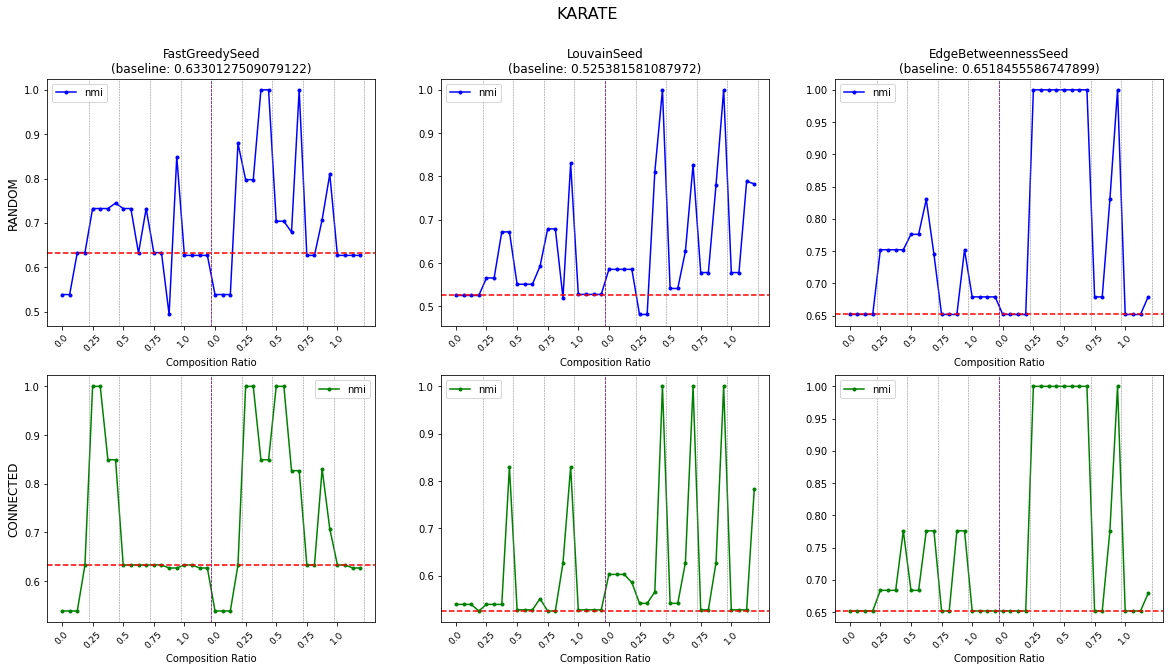

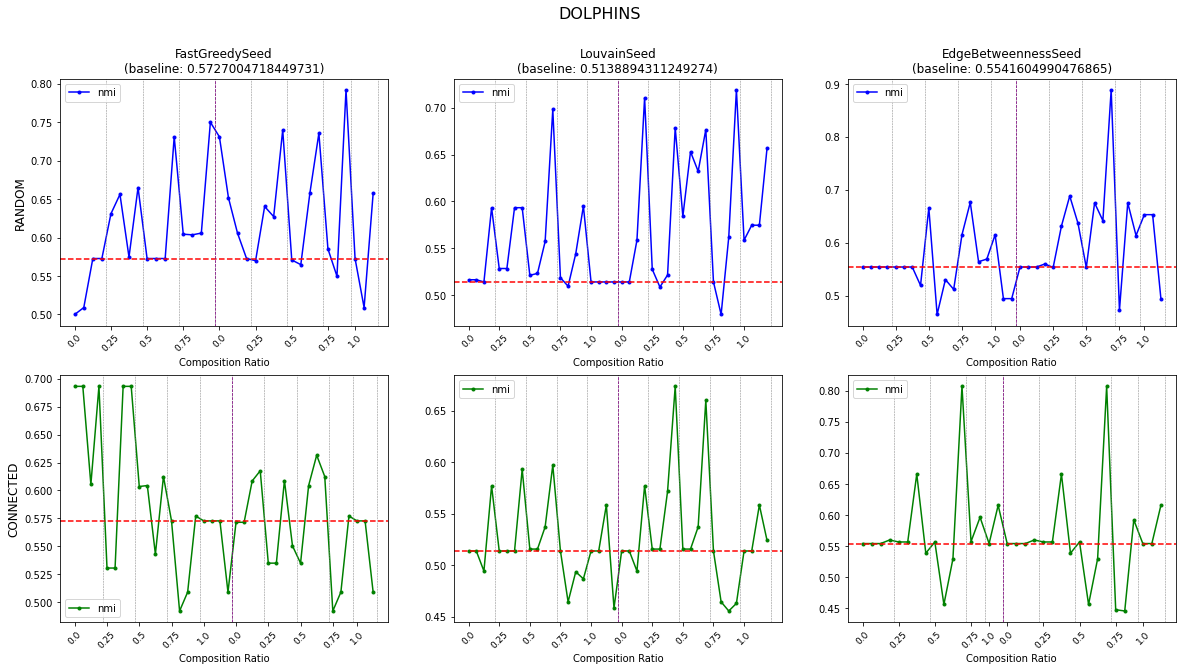

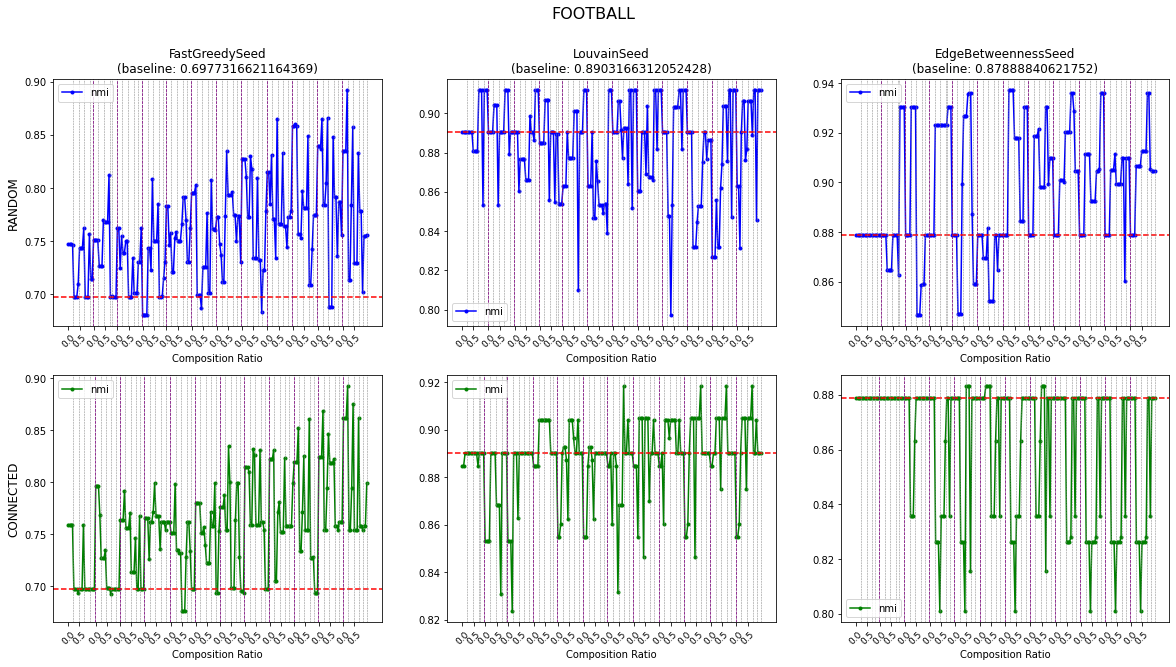

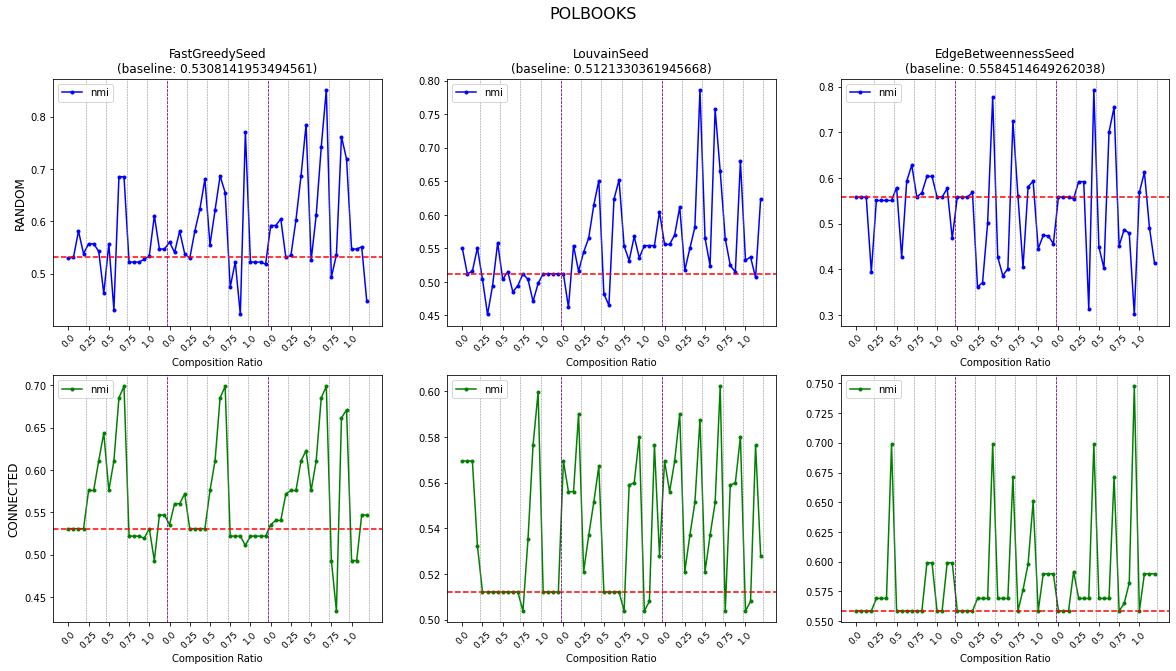

In [191]:
filename = 'benchmark-2020-08-24T07:26:54.220Z'
data= load_df(filename)
df = mk_df(filter_bad_seeds(data))
print_plots(df, data, 'nmi')

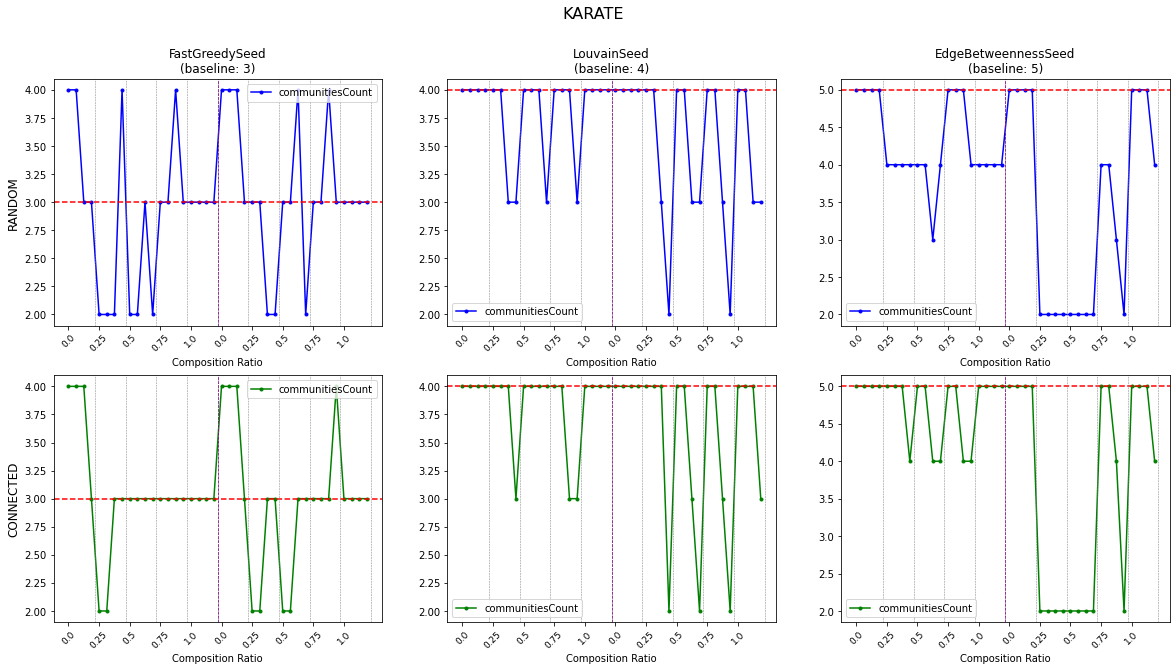

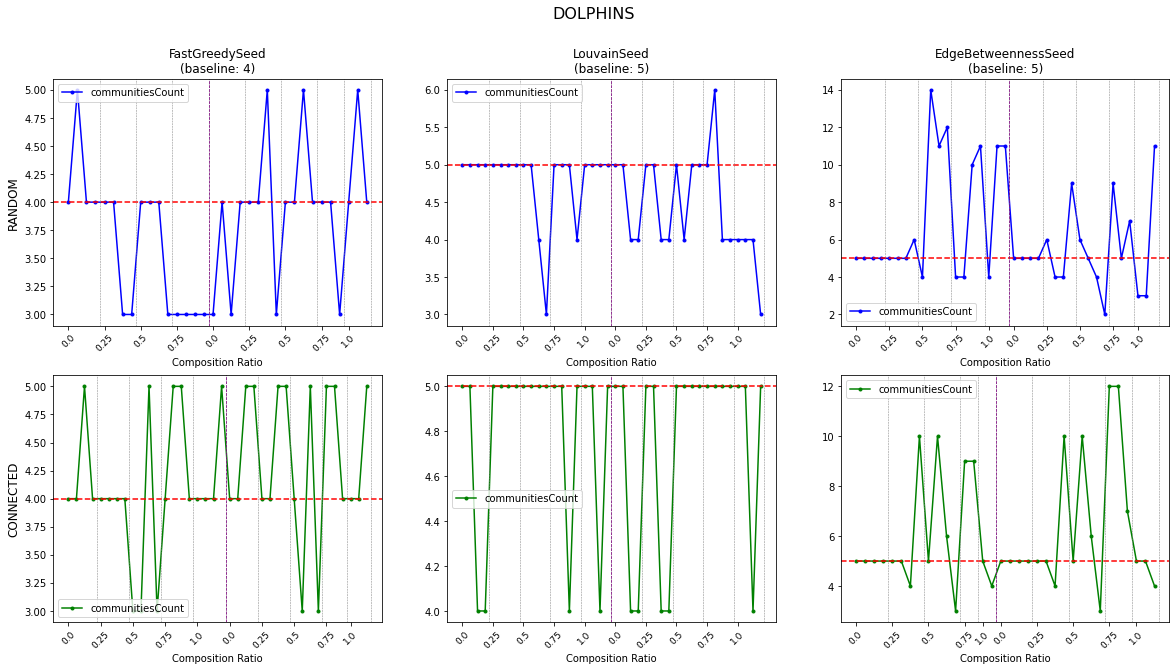

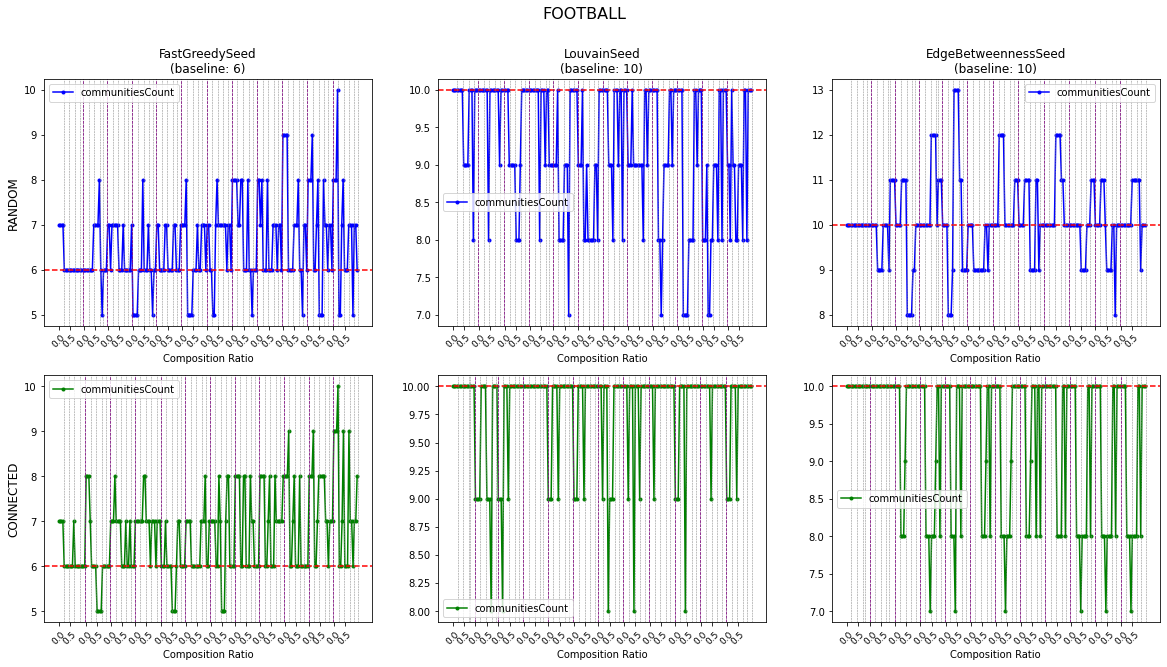

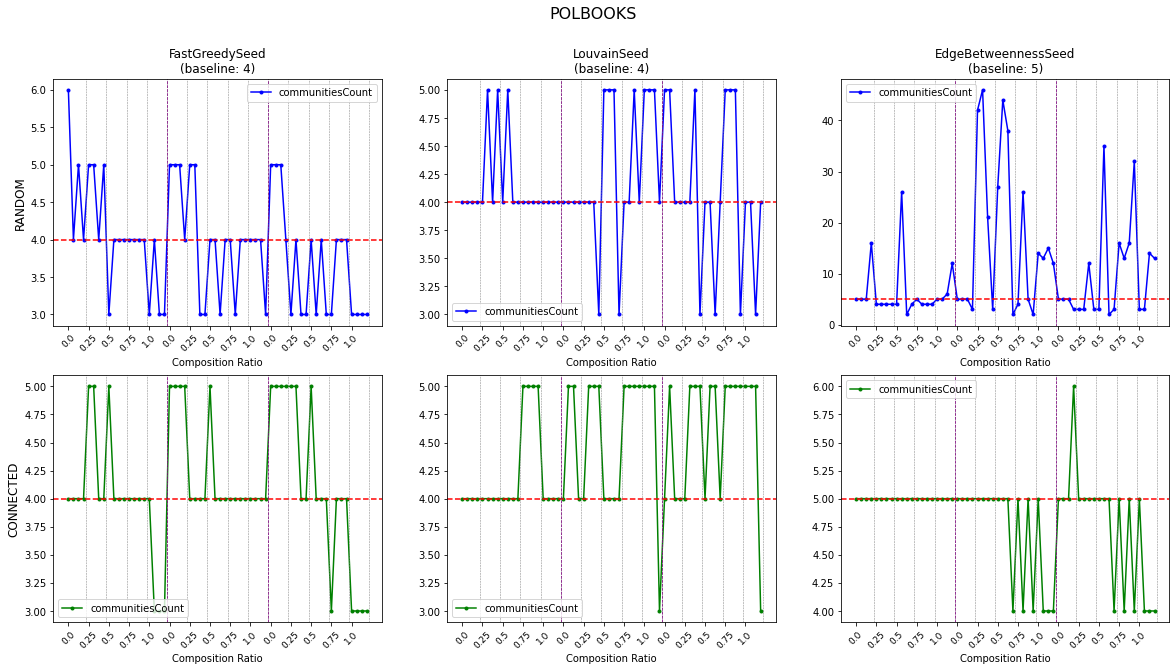

In [192]:
print_plots(df, data, 'communitiesCount')

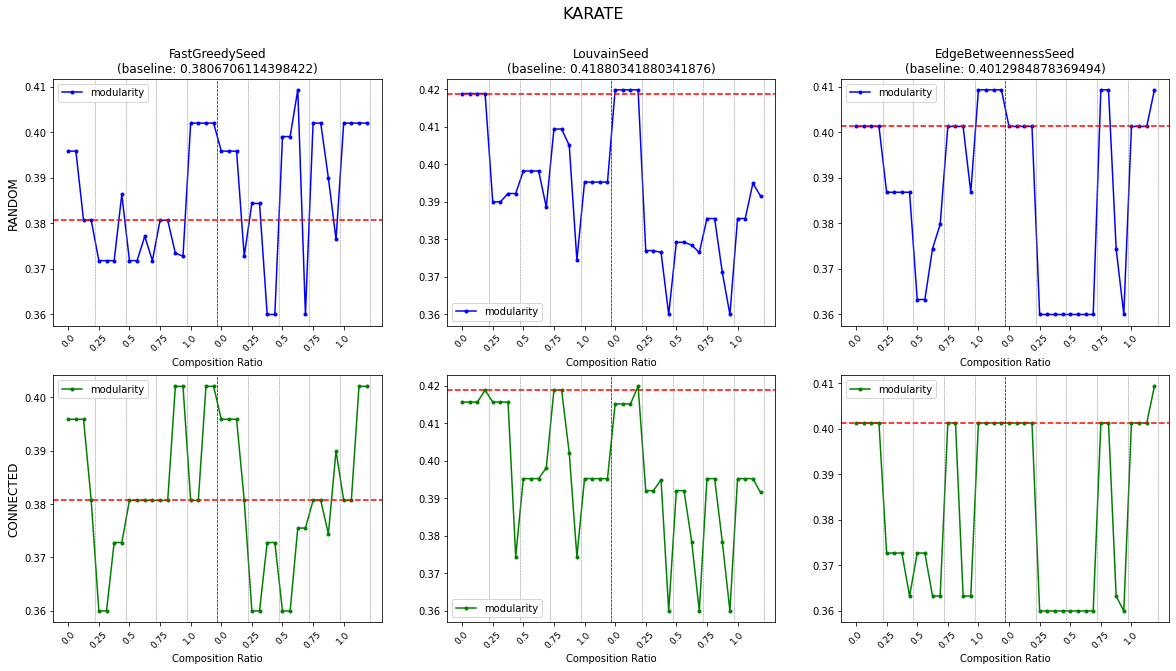

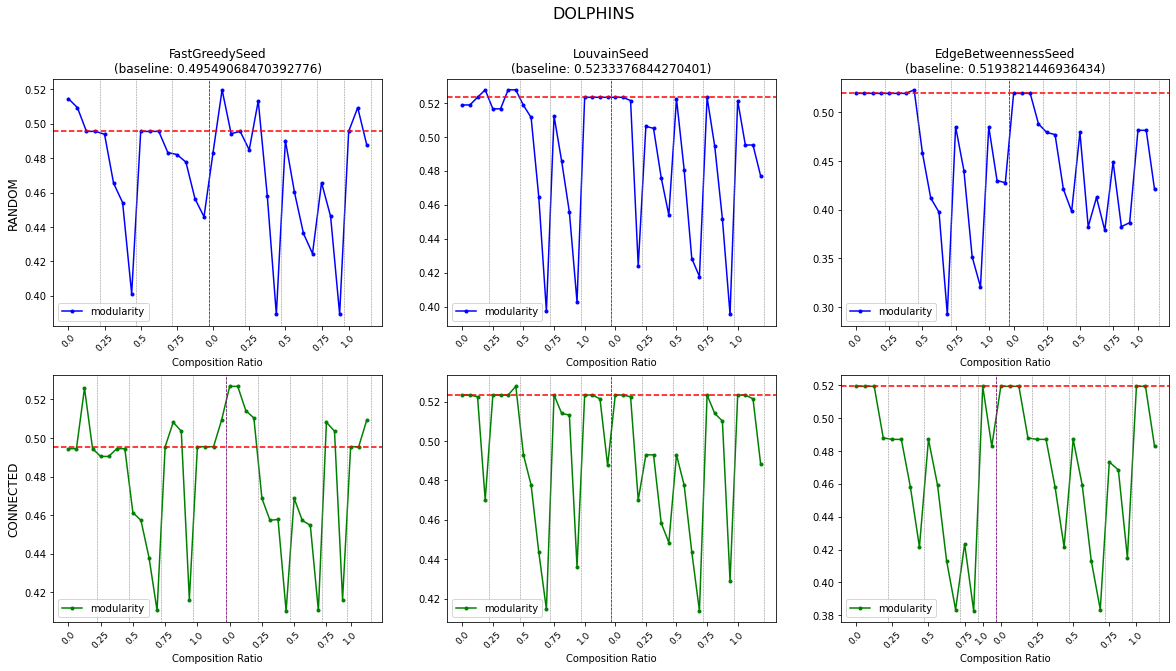

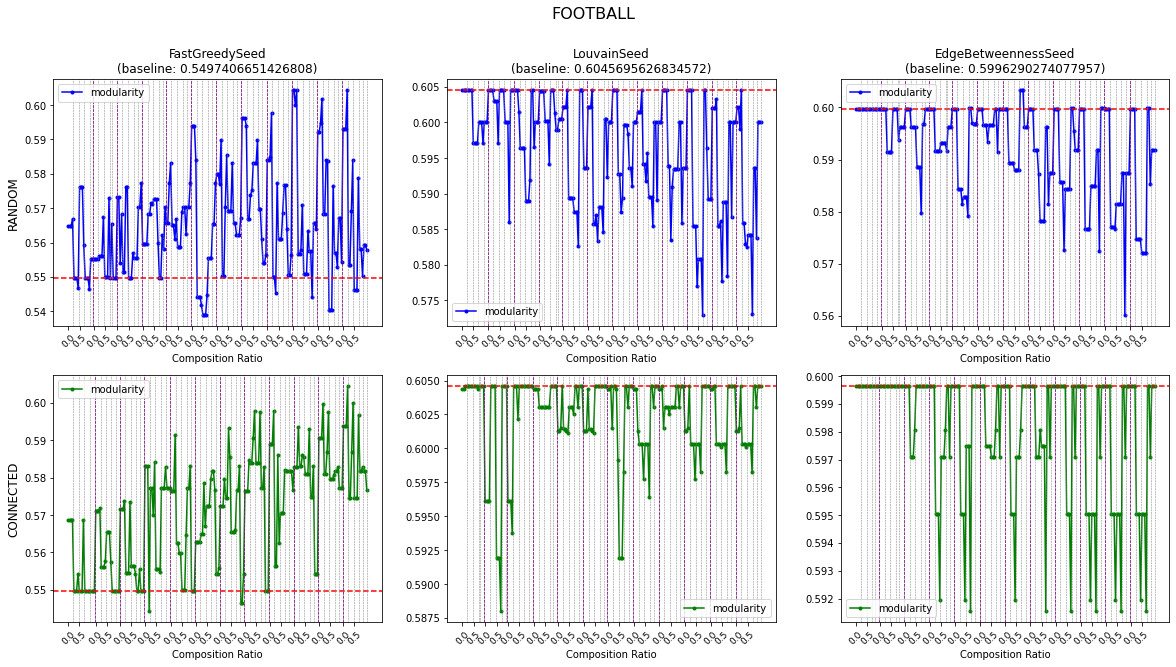

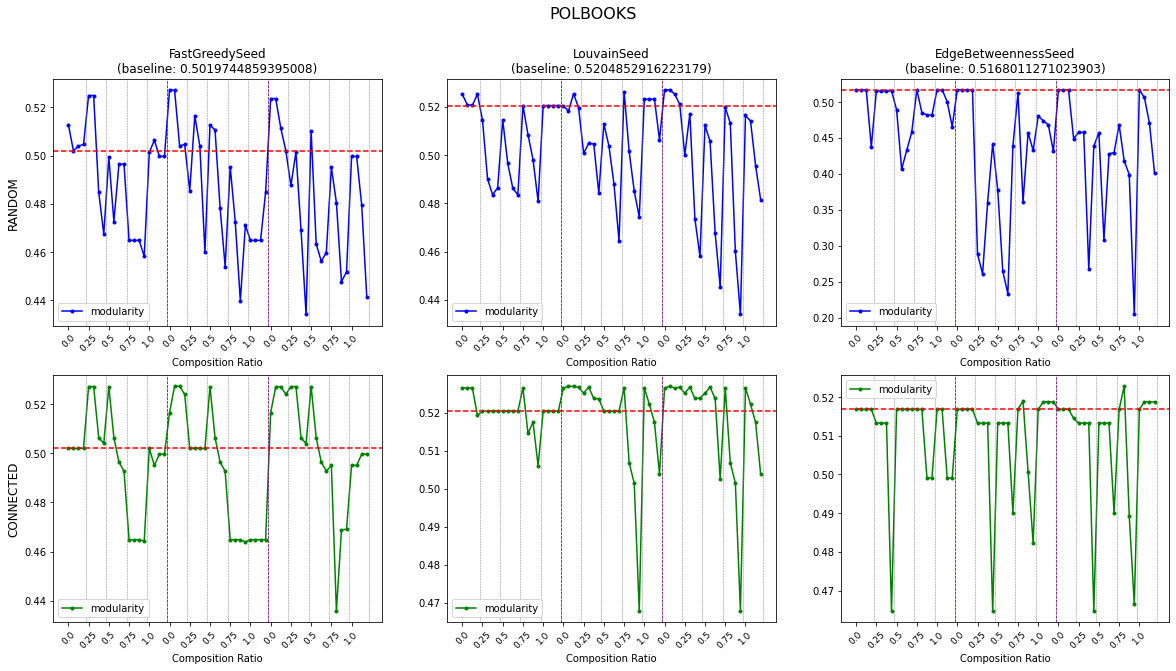

In [193]:
print_plots(df, data, 'modularity')

In [ ]:
# old & brokern becnhmark (wrong connected)
# filename = 'benchmark-2020-08-23T14:48:15.551Z'
# data= load_df(filename)
# df = mk_df(filter_bad_seeds(data))
# print_plots(df, data,  'nmi')